# Cumulative Spectral Gradient (CSG) metric
from https://github.com/Dref360/spectral_metric

In [44]:
from spectral_metric.estimator import CumulativeGradientEstimator
from myutils import Datasets
import os 
import numpy as np
from matplotlib import pyplot as plt

In [4]:
pca = Datasets.get_preprocessed_datasets("PCA")["PCA"]

In [71]:
d = dict()

for subset in os.listdir("data/PCA"):
    X = pca[subset]["x_train"]
    y = pca[subset]["y_train_binary"]
    estimator = CumulativeGradientEstimator(M_sample=5000, k_nearest=2)
    estimator.fit(data=X, target=y)
    d[subset] =estimator.csg 

In [72]:
arr = np.array(list(d.values()))

In [31]:
ae = Datasets.get_preprocessed_datasets("Autoencoder")["Autoencoder"]

In [73]:
dae = dict()

for subset in os.listdir("data/PCA"):
    X = ae[subset]["x_train"]
    y = ae[subset]["y_train_binary"]
    estimator = CumulativeGradientEstimator(M_sample=5000, k_nearest=2)
    estimator.fit(data=X, target=y)
    dae[subset] =estimator.csg 

In [74]:
arr2 = np.array(list(dae.values()))

In [65]:
raw = Datasets.get_preprocessed_datasets("RAW")["RAW"]


In [75]:
draw = dict()

for subset in os.listdir("data/PCA"):
    X = raw[subset]["x_train"]
    y = raw[subset]["y_train_binary"]
    estimator = CumulativeGradientEstimator(M_sample=5000, k_nearest=2)
    estimator.fit(data=X, target=y)
    draw[subset] =estimator.csg 

In [76]:
arr3 = np.array(list(draw.values()))

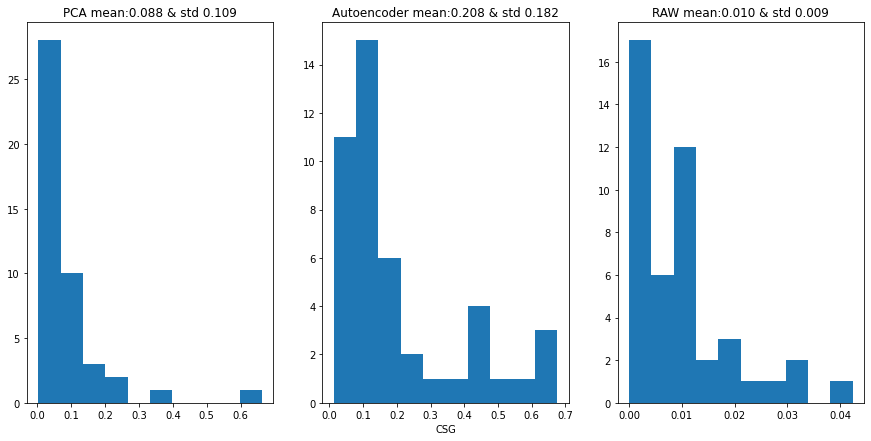

In [78]:
fig,ax = plt.subplots(1,3,figsize=(15,7))
ax[0].hist(arr, bins=10)
ax[0].set_title("PCA mean:{:.3f} & std {:.3f}".format(np.mean(arr), np.std(arr)))

ax[1].hist(arr2, bins=10)
ax[1].set_title("Autoencoder mean:{:.3f} & std {:.3f}" .format(np.mean(arr2), np.std(arr2)))
ax[1].set_xlabel("CSG")
ax[2].hist(arr3, bins=10)
ax[2].set_title("RAW mean:{:.3f} & std {:.3f}" .format(np.mean(arr3), np.std(arr3)))
plt.savefig("plots/cumulative_spectral_gradient.png")
plt.show()